In [1]:
from growthsimple import *
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
raw_data = pd.read_csv('./For_GAI/For_GAI.csv', error_bad_lines=False, sep='\t')
raw_data = raw_data.rename(columns={i:j for i,j in zip(list(raw_data), [i.replace('.','_') for i in list(raw_data)])})

# remove trailing non-alphabet of e_substep
raw_data['e_substep'] = raw_data.e_substep.fillna('').apply(rm_trailing_num)

# subset dataframe by e_affid
subset = subset_by_col(raw_data, by_column='e_affid', sort_value='e_timestamp', return_type='dict')

# extract non-converted and converted user e_affid
zero_users = raw_data[raw_data.customer == 0].e_affid.unique()
one_users = raw_data[raw_data.customer == 1].e_affid.unique()
# base on meeting with mackeeper, this e_affid is a testing e_affid
one_users = [i for i in one_users if i != '00000000-0000-0000-0000-000000000000-mzb']

# add time difference to each user's data
subset_td = {i:get_time_diff(subset[i]) for i in tqdm(list(subset))}


100%|█████████████████████████████████████████████████████████████████| 10233033/10233033 [00:05<00:00, 1786179.47it/s]


In [3]:
subset_td[one_users[106]]

,e_step,e_substep,e_timestamp,e_affid,e_version,order_tmstmp,customer,time_diff
0,Landing_Loaded,Hit,1.553350e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,NaN,1.554564e+09,1,0.000000e+00
1,Landing_Loaded,View,1.553350e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,NaN,1.554564e+09,1,1.757990e+00
2,Download_Button_Click,download_button_click_other,1.553350e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,NaN,1.554564e+09,1,2.217050e+01
3,MKInstallEvents,WelcomeBack,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,4.6.1,1.554564e+09,1,1.211378e+06
4,MKInstallEvents,Download_Started,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,4.6.1,1.554564e+09,1,1.614836e+01
5,MKInstallEvents,Download_Finished,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,4.6.1,1.554564e+09,1,3.853590e+00
6,MKInstallEvents,Install_Started,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,4.6.1,1.554564e+09,1,5.861418e+00
7,MKInstallEvents,Install_Finished,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,4.6.1,1.554564e+09,1,1.159476e+01
8,MKInstallEvents,Helper_Registration_Failed,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,4.6.1,1.554564e+09,1,2.348680e+00
9,Landing_Loaded,Hit,1.554561e+09,d7963000-4d74-11e9-a20b-dac266b83e00-mzb,NaN,1.554564e+09,1,2.544556e-01


In [4]:
user106 = PatternCounter(subset_td[one_users[106]], max_l=8, min_l=2, split=True, cutoff=3600)

In [5]:
type(user106)

growthsimple.PatternCounter

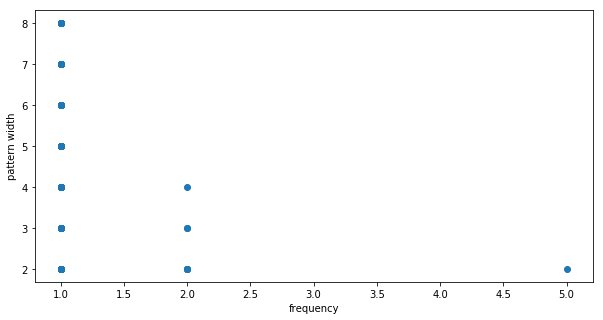

In [6]:
user106.plot()

In [7]:
help(PatternCounter)

Help on class PatternCounter in module growthsimple:

class PatternCounter(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, in_df, max_l, min_l, split=True, cutoff=3600)
 |      find pattern (substring) frequency
 |          each pattern is stored in class StringInfo
 |      
 |          need to call for_mackeeper_gs_format(), split_session(), get_substrings()
 |      
 |      arg: in_df (DataFrame) - a mackeeper dataframe for a single user with timediff added
 |           max_l (int) - longest possible length
 |           min_l (int) - shortest possible length
 |           split (boolean) - count patterns by splitting sessions, optional, default is True
 |           cutoff (int/float) - cutoff time in seconds for split, optional, default is 3600
 |  
 |  plot(self)
 |      plot length vs frequency
 |  
 |  reorder_by_target(self, target, min_para, top_n=None)
 |      reorder result from function user_pattern_info
 |          return the same format as user_pattern_inf

In [8]:
user106.pattern_info

In [10]:
user106.pattern_info[0]

In [9]:
user106.pattern_info[0].string

['FirstRun/',
 'stats/',
 'ZBEventStatistic/WelcomeScreenStartScanClicked',
 'ZBEventStatistic/SignUpOnBigWelcomeScreenShown',
 'ZBEventStatistic/SignUpOnBigWelcomeScreenContinueWithEmail',
 'ZBEventStatistic/FindAndFixFirstScanStarted',
 'ZBEventStatistic/FindAndFixScanStarted',
 'ZBEventStatistic/SafeCleanupScanStarted']

In [10]:
user106.pattern_info[0].frequency

1

In [11]:
user106.pattern_info[0].string_length

8

In [14]:
user106.reorder_by_target('by_frequency', min_para = 2)

In [12]:
help(CoverageCounter)

Help on class CoverageCounter in module growthsimple:

class CoverageCounter(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, in_list, max_l, min_l, split=True, cutoff=3600)
 |      Extract count of patterns for a given set of user dataframes
 |      
 |      arg: in_list (list) - a list of dataframes
 |           max_l (int) - longest possible length
 |           min_l (int) - shortest possible length
 |           split (boolean) - count patterns by splitting sessions, option, default is True
 |           cutoff (int/float) - cutoff time in seconds for split, optional, default is 3600
 |      
 |      attributes: in_list (list) - the input list of dataframes
 |                  total_users (int) - the total users collected
 |                  all_info (list) - a list that contains all users info in PatternCounter object
 |                  all_string (list) - a list that contains all string in StriingInfo object
 |  
 |  extract_count(self, method, condition='all', t

In [33]:
set1 = one_users[0:999]

In [34]:
sample1 = [subset_td[i] for i in one_users[:1000]]

In [36]:
coverage_on_sample1 = CoverageCounter(sample1, max_l = 8, min_l = 2, split=True, cutoff=3600)

verify number of users is 1000

In [37]:
coverage_on_sample1.total_users

1000

In [39]:
coverage_on_sample1.all_string[0].string_length

8

In [40]:
coverage_user_counts = coverage_on_sample1.extract_count('total_coverage', 'all')

In [41]:
coverage_user_counts

{"['MKInstallEvents/Download_Finished', 'MKInstallEvents/Install_Started']": 809,
 "['ZBEventStatistic/SafeCleanupScanFinished', 'ZBEventStatistic/DuplicatesFinderScanStarted']": 798,
 "['MKInstallEvents/Download_Started', 'MKInstallEvents/Download_Finished']": 796,
 "['MKInstallEvents/Download_Started', 'MKInstallEvents/Download_Finished', 'MKInstallEvents/Install_Started']": 794,
 "['ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished']": 794,
 "['ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/LoginItemsScanStarted']": 791,
 "['ZBEventStatistic/UpdateTrackerScanStarted', 'ZBEventStatistic/UpdateTrackerScanFinished']": 788,
 "['ZBEventStatistic/LoginItemsScanFinished', 'ZBEventStatistic/AdwareCleanerScanStarted']": 788,
 "['ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished']": 787,
 "['ZBEventStatistic/DuplicatesFinderScanFinished', 'ZBEventStatistic/SmartUninsta

In [42]:
patterns = list(coverage_user_counts.keys())

In [43]:
patterns[0]

"['MKInstallEvents/Download_Finished', 'MKInstallEvents/Install_Started']"

In [44]:
patterns[1]

"['ZBEventStatistic/SafeCleanupScanFinished', 'ZBEventStatistic/DuplicatesFinderScanStarted']"

In [45]:
patterns

["['MKInstallEvents/Download_Finished', 'MKInstallEvents/Install_Started']",
 "['ZBEventStatistic/SafeCleanupScanFinished', 'ZBEventStatistic/DuplicatesFinderScanStarted']",
 "['MKInstallEvents/Download_Started', 'MKInstallEvents/Download_Finished']",
 "['MKInstallEvents/Download_Started', 'MKInstallEvents/Download_Finished', 'MKInstallEvents/Install_Started']",
 "['ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished']",
 "['ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/LoginItemsScanStarted']",
 "['ZBEventStatistic/UpdateTrackerScanStarted', 'ZBEventStatistic/UpdateTrackerScanFinished']",
 "['ZBEventStatistic/LoginItemsScanFinished', 'ZBEventStatistic/AdwareCleanerScanStarted']",
 "['ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished']",
 "['ZBEventStatistic/DuplicatesFinderScanFinished', 'ZBEventStatistic/SmartUninstallerScanStarted']",
 "['ZBEventStatistic/Smar

In [49]:
total_counts = list(coverage_user_counts.values())

In [121]:
d = pd.DataFrame(patterns, columns=["path"])
d.head()

,path
0,"['MKInstallEvents/Download_Finished', 'MKInsta..."
1,"['ZBEventStatistic/SafeCleanupScanFinished', '..."
2,"['MKInstallEvents/Download_Started', 'MKInstal..."
3,"['MKInstallEvents/Download_Started', 'MKInstal..."
4,"['ZBEventStatistic/LoginItemsScanStarted', 'ZB..."


In [122]:
d['path'] = d['path'].map(lambda x: x.replace("]", ""))
d['path'] = d['path'].map(lambda x: x.replace("[", ""))
d['path'] = d['path'].map(lambda x: x.replace("'", ""))
d.head()

,path
0,"MKInstallEvents/Download_Finished, MKInstallEv..."
1,"ZBEventStatistic/SafeCleanupScanFinished, ZBEv..."
2,"MKInstallEvents/Download_Started, MKInstallEve..."
3,"MKInstallEvents/Download_Started, MKInstallEve..."
4,"ZBEventStatistic/LoginItemsScanStarted, ZBEven..."


In [123]:
full_paths = d.join(
                d['path'].str.split(',', expand = True).rename(
                    columns = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
                )
)
full_paths.head()

,path,A,B,C,D,E,F,G,H
0,"MKInstallEvents/Download_Finished, MKInstallEv...",MKInstallEvents/Download_Finished,MKInstallEvents/Install_Started,None,None,None,None,None,None
1,"ZBEventStatistic/SafeCleanupScanFinished, ZBEv...",ZBEventStatistic/SafeCleanupScanFinished,ZBEventStatistic/DuplicatesFinderScanStarted,None,None,None,None,None,None
2,"MKInstallEvents/Download_Started, MKInstallEve...",MKInstallEvents/Download_Started,MKInstallEvents/Download_Finished,None,None,None,None,None,None
3,"MKInstallEvents/Download_Started, MKInstallEve...",MKInstallEvents/Download_Started,MKInstallEvents/Download_Finished,MKInstallEvents/Install_Started,None,None,None,None,None
4,"ZBEventStatistic/LoginItemsScanStarted, ZBEven...",ZBEventStatistic/LoginItemsScanStarted,ZBEventStatistic/LoginItemsScanFinished,None,None,None,None,None,None


In [125]:
full_paths.drop(['path'], axis =1, inplace=True)
full_paths.head()

,A,B,C,D,E,F,G,H
0,MKInstallEvents/Download_Finished,MKInstallEvents/Install_Started,None,None,None,None,None,None
1,ZBEventStatistic/SafeCleanupScanFinished,ZBEventStatistic/DuplicatesFinderScanStarted,None,None,None,None,None,None
2,MKInstallEvents/Download_Started,MKInstallEvents/Download_Finished,None,None,None,None,None,None
3,MKInstallEvents/Download_Started,MKInstallEvents/Download_Finished,MKInstallEvents/Install_Started,None,None,None,None,None
4,ZBEventStatistic/LoginItemsScanStarted,ZBEventStatistic/LoginItemsScanFinished,None,None,None,None,None,None


In [127]:
len(total_counts)

115164

In [128]:
full_paths.shape

(115164, 8)

In [131]:
total_counts = pd.DataFrame(total_counts, columns=["count"])
total_counts.head()

,count
0,809
1,798
2,796
3,794
4,794


In [133]:
full_paths = pd.concat([full_paths, total_counts], axis=1)

In [150]:
subset1 = full_paths.head(15)
subset1.shape

(15, 9)

In [151]:
subset1.head()

,A,B,C,D,E,F,G,H,count
0,MKInstallEvents/Download_Finished,MKInstallEvents/Install_Started,None,None,None,None,None,None,809
1,ZBEventStatistic/SafeCleanupScanFinished,ZBEventStatistic/DuplicatesFinderScanStarted,None,None,None,None,None,None,798
2,MKInstallEvents/Download_Started,MKInstallEvents/Download_Finished,None,None,None,None,None,None,796
3,MKInstallEvents/Download_Started,MKInstallEvents/Download_Finished,MKInstallEvents/Install_Started,None,None,None,None,None,794
4,ZBEventStatistic/LoginItemsScanStarted,ZBEventStatistic/LoginItemsScanFinished,None,None,None,None,None,None,794


In [152]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.offline

In [157]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464', '#442255', '#6655bb', '#ff8877']
    labelList = []
    colorNumList = []
    i = 0
    for catCol in cat_cols:
        i = i + 1
        print('iteration: ', i)
        labelListTemp =  list(set(df[catCol].values))
        print("labelListTemp: ", labelListTemp)
        colorNumList.append(len(labelListTemp))
        print("colorNumList: ", colorNumList)
        labelList = labelList + labelListTemp
        print("labelList: ", labelList)
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    print("LabelList Duplicates Removed", labelList)
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        print("idx: ", idx)
        print("colorNum:", colorNum )
        colorList = colorList + [colorPalette[idx]]*colorNum
        print("colorList: ", colorList)
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    
    
    
    fig = go.Figure(data=[go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
            source = sourceTargetDf['sourceID'],
            target = sourceTargetDf['targetID'],
            value = sourceTargetDf['count']
        )
    )])
    
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    #fig = dict(data=[data], layout=layout)
    print("label len: ", len(labelList))
    print("color len: ", len(colorList))
    return fig

In [158]:
fig = genSankey(subset1,cat_cols=['A','B','C','D','E', 'F', 'G', 'H'],value_cols='count',title='Converted User Paths')

iteration:  1
labelListTemp:  ['MKInstallEvents/Download_Started', 'ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished', 'ZBEventStatistic/SafeCleanupScanFinished', 'ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/DuplicatesFinderScanFinished', 'MKInstallEvents/Download_Finished', 'ZBEventStatistic/UpdateTrackerScanStarted', 'ZBEventStatistic/BuyNowOpened', 'ZBEventStatistic/SmartUninstallerScanFinished']
colorNumList:  [10]
labelList:  ['MKInstallEvents/Download_Started', 'ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished', 'ZBEventStatistic/SafeCleanupScanFinished', 'ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/DuplicatesFinderScanFinished', 'MKInstallEvents/Download_Finished', 'ZBEventStatistic/UpdateTrackerScanStarted', 'ZBEventStatistic/BuyNowOpened', 'ZBEventStatistic/SmartUninstallerScanFinished']
iteration:  2
labelListTemp:  [' ZBEventStatistic/LoginItemsScanFinished', ' MKInstallEv

labelList:  ['MKInstallEvents/Download_Started', 'ZBEventStatistic/LoginItemsScanStarted', 'ZBEventStatistic/LoginItemsScanFinished', 'ZBEventStatistic/SafeCleanupScanFinished', 'ZBEventStatistic/UpdateTrackerScanFinished', 'ZBEventStatistic/DuplicatesFinderScanFinished', 'MKInstallEvents/Download_Finished', 'ZBEventStatistic/UpdateTrackerScanStarted', 'ZBEventStatistic/BuyNowOpened', 'ZBEventStatistic/SmartUninstallerScanFinished', ' ZBEventStatistic/LoginItemsScanFinished', ' MKInstallEvents/Download_Finished', ' ZBEventStatistic/InAppBuyNowShown', ' MKInstallEvents/Install_Started', ' ZBEventStatistic/AdwareCleanerScanStarted', ' ZBEventStatistic/UpdateTrackerScanFinished', ' ZBEventStatistic/DuplicatesFinderScanStarted', ' ZBEventStatistic/UpdateTrackerScanStarted', ' ZBEventStatistic/SmartUninstallerScanStarted', ' ZBEventStatistic/LoginItemsScanStarted', ' ZBEventStatistic/LoginItemsScanFinished', ' MKInstallEvents/Install_Started', None, ' ZBEventStatistic/AdwareCleanerScanStart

In [175]:
fig.update_layout(title_text="Top 15 Converted User Paths Example", autosize=True, font_size=10)
fig.show()

In [176]:
plotly.offline.plot(fig, validate=False)

'temp-plot.html'